# DOP project: Calculator for Option Strategies

***Written by the PGDM Research and Analytics cell***

# Basics of option payoffs

Before starting out, here are some common notations used in Options pricing:

1. Strike Price: $K$

2. Price of Asset at Maturity: $S_T$

3. Price of the **call option** is: c

4. The price of the **put option** is: p

Note that we will mention all **payoffs** by including the option price. With this, here are the payoffs for various types of Options and across different positions.

1. **Long call payoff**: $\max(S_T - K - c, -c)$

2. **Short call payoff**: $-\max(S_T - K - c, -c)$

3. **Long put payoff**: $\max(K - S_T - p, -p)$

4. **Short put payoff**: $-\max(K - S_T - p, -p)$


# About combined payoffs

In this report we will present the combined payoffs resulting from holding a portfolio which could be a combination of long/short positions in stock and long/short positions in multiple types of options. The idea is to plot the payoffs from the constituents of the portfolio and then plot the combined payoffs as well. 

# About the program

Here some features about this Options payoff calculator:

1. This is an interactive program - It allows users to enter values on the basis of which, the payoff plots are generated. **First** the user enters **today's stock price** on the basis of which random numbers simulating stock prices are generated. **Secondly** the user can enter whatever instruments he/she desires. We give the user the choice of - long/short Call options, Long/short Put options, Long/short share positions. 

2. This program has been coded entirely using **basic Python functionality** of conditional statements, functions and loops. The only libraries that have been used are the **plotting** libraries and **random number generator** libraries. 

3. In addition to plotting the payoffs (combined and individual), the program also outputs the **maximum** payoff and the **stock prices** at which maximum payoff occurs. 

&nbsp;

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [130]:
def long_call(c, ST, K):
    payoff_LC = []
    for i in ST:
        if i <= K:
            payoff_LC.append(-c)
        else:
            payoff_LC.append(i - K - c)
    return np.array(payoff_LC)

def long_put(p, ST, K):
    payoff_LP = []
    for i in ST:
        if i < K:
            payoff_LP.append(K - i - p)
        else:
            payoff_LP.append(-p)
    return np.array(payoff_LP)

def short_call(c, ST, K):
    payoff_SC = []
    for i in ST:
        if i <= K:
            payoff_SC.append(c)
        else:
            payoff_SC.append(-(i - K - c))
    return np.array(payoff_SC)
        
def short_put(p, ST, K):
    payoff_SP = []
    for i in ST:
        if i < K:
            payoff_SP.append(-(K - i - p))
        else:
            payoff_SP.append(p)
    return np.array(payoff_SP)
            
def short_stock(price, ST):
    short_S = []
    for i in ST:
        short_S.append(-(-price + i))
    return np.array(short_S)
        
def long_stock(price, ST):
    long_S = []
    for i in ST:
        long_S.append(-price + i)
    return np.array(long_S)

def combined_payoff(ST_1, args):
    color = cm.rainbow(np.linspace(0, 1, len(args)))
    total_payoff = np.zeros(len(ST_1))
    fig = plt.figure(figsize = (7, 7))
    for i, c in zip(range(len(args)), color):
        total_payoff += args[i]()
        plt.plot(ST_1, args[i](), c=c, linestyle='--')
    plt.plot(ST_1, total_payoff, 'r')
    
def extract_function_args(ST_1, port):
    func_args = {}
    color = cm.rainbow(np.linspace(0, 1, len(port)))
    total_pay = np.zeros(len(ST_1))
    fig = plt.figure(figsize = (7, 7))
    for key, value in port.items():
        if len(port[key]) == 0:
            pass
        elif len(port[key]) != 0:
            func_args[key] = value
    return func_args

def plot_funcs(ST_1, port):
    plt.figure(figsize = (8, 8))
    func_args = extract_function_args(ST_1, port)
    total_payoff = np.zeros(len(ST_1))
    for key, value in func_args.items():
        if key == 'sell call':
            color = cm.rainbow(np.linspace(0, 1, len(value)))
            for i, c in zip(range(len(value)), color):
                plt.plot(ST_1, short_call(value[i], ST_1,
                                        func_args['strike_SC'][i]), c=c, linestyle='--')
                total_payoff += short_call(value[i], ST_1, func_args['strike_SC'][i])
        elif key == 'buy call':
            color = cm.rainbow(np.linspace(0, 1, len(value)))
            for i, c in zip(range(len(value)), color):
                plt.plot(ST_1, long_call(value[i], ST_1,
                                          func_args['strike_LC'][i]), c=c, linestyle='--') 
                total_payoff += long_call(value[i], ST_1, func_args['strike_LC'][i])
        elif key == 'sell put':
            color = cm.rainbow(np.linspace(0, 1, len(value)))
            for i, c in zip(range(len(value)), color):
                plt.plot(ST_1, short_put(value[i], ST_1,
                                          func_args['strike_SP'][i]), c=c, linestyle='--') 
                total_payoff += short_put(value[i], ST_1, func_args['strike_SP'][i])
        elif key == 'buy put':
            color = cm.rainbow(np.linspace(0, 1, len(value)))
            for i, c in zip(range(len(value)), color):
                plt.plot(ST_1, long_put(value[i], ST_1,
                                          func_args['strike_LP'][i]), c=c, linestyle='--') 
                total_payoff += long_put(value[i], ST_1, func_args['strike_LP'][i])
        elif key == 'buy share':
            color = cm.rainbow(np.linspace(0, 1, len(value)))
            for i, c in zip(range(len(value)), color):
                plt.plot(ST_1, long_stock(value[i], ST_1),
                                          c=c, linestyle='--') 
                total_payoff += long_stock(value[i], ST_1)
        elif key == 'sell share':
            color = cm.rainbow(np.linspace(0, 1, len(value)))
            for i, c in zip(range(len(value)), color):
                plt.plot(ST_1, short_stock(value[i], ST_1),
                                          c=c, linestyle='--')
                total_payoff += short_stock(value[i], ST_1)    
    plt.plot(ST_1, total_payoff, 'g', linewidth=4)  
    plt.xlabel('ST')
    plt.ylabel('Payoff')
    plt.ylim(-17, 17)
    m = np.max(total_payoff)
    print("****************")
    print()
    print("Max payoff is: ", m)
    print()
    print("****************")
    print()
    print("Stock price at which max payoff is achieved: ", 
          ST_1[np.where(total_payoff == m)])
    print()
    print("****************")

In [132]:
def display_menu():
    print("****************")
    print()
    print("Here are your options for creating a portfolio:")
    print("1. Buy a share (long stock position) -- type 'buy share'")
    print("2. Sell a share (short stock position) -- type 'sell share'")
    print("3. Buy a call option (long call position) -- type 'buy call'")
    print("4. Sell a call option (short call position) -- type 'sell call'")
    print("5. Buy a put option (long put position) -- type 'buy put'")
    print("6. Sell a put option (short put position) -- type 'sell put'")
    print()
    print("****************")
    print()

def create_folio():   
    sigma = 20
    print("*********")
    print()
    print("Calculator is now running")
    print()
    today = float(input("ENTER TODAY'S STOCK PRICE: "))
    print()
    ST_1 = np.sort(np.array(np.random.normal(today, sigma, size = 1000)))
    folio_dict = {'buy share': [], 'sell share': [], 'buy call': [], 'sell call': [],
                  'buy put': [], 'sell put': [], 'strike_LC': [], 'strike_SC': [],
                  'strike_LP': [], 'strike_SP': []}
    args_main = {}
    bool1 = True
    counter = 0
    while bool1 == True:
        display_menu()
        print()
        a = input("What would you like ? (type 'nothing' to exit || type the action words otherise): ")
        if a == 'nothing':
            bool1 = False
            return folio_dict, ST_1, args_main
        elif a == 'buy share':
            st = float(input("enter a stock price: "))
            folio_dict['buy share'].append(st)
            args_main[counter] = (lambda: long_stock(st, ST_1))
        elif a == 'sell share':
            st = float(input("enter a stock price: "))
            folio_dict['sell share'].append(st)
            args_main[counter] = (lambda: short_stock(st, ST_1))
        elif a == 'buy call':
            c = float(input("enter a long call price: "))
            folio_dict['buy call'].append(c)
            k = float(input("enter a long call strike price: "))
            folio_dict['strike_LC'].append(k)
            args_main[counter] = (lambda: long_call(folio_dict['buy call'][-1], 
                                                    ST_1, folio_dict['strike_LC'][-1]))
        elif a == 'sell call':
            c = float(input("enter a short call price: "))
            folio_dict['sell call'].append(c)
            k = float(input("enter a short call strike price: "))
            folio_dict['strike_SC'].append(k)
            args_main[counter] = (lambda: short_call(folio_dict['sell call'][-1], 
                                                     ST_1, folio_dict['sell call'][-1]))
        elif a == 'buy put':
            p = float(input("enter a long put price: "))
            folio_dict['buy put'].append(p)
            k = float(input("enter a long put strike price: "))
            folio_dict['strike_LP'].append(k)
            args_main[counter] = (lambda: long_put(p, ST_1, k))
        elif a == 'sell put':
            p = float(input("enter a short put price: "))
            folio_dict['sell put'].append(p)
            k = float(input("enter a short put strike price: "))
            folio_dict['strike_SP'].append(k)
            args_main[counter] = (lambda: short_put(p, ST_1, k))
        counter += 1

In [133]:
port, stockprice, args_new = create_folio()

*********

Calculator is now running



ENTER TODAY'S STOCK PRICE:  212.0



****************

Here are your options for creating a portfolio:
1. Buy a share (long stock position) -- type 'buy share'
2. Sell a share (short stock position) -- type 'sell share'
3. Buy a call option (long call position) -- type 'buy call'
4. Sell a call option (short call position) -- type 'sell call'
5. Buy a put option (long put position) -- type 'buy put'
6. Sell a put option (short put position) -- type 'sell put'

****************




What would you like ? (type 'nothing' to exit || type the action words otherise):  sell call
enter a short call price:  7.63
enter a short call strike price:  215.0


****************

Here are your options for creating a portfolio:
1. Buy a share (long stock position) -- type 'buy share'
2. Sell a share (short stock position) -- type 'sell share'
3. Buy a call option (long call position) -- type 'buy call'
4. Sell a call option (short call position) -- type 'sell call'
5. Buy a put option (long put position) -- type 'buy put'
6. Sell a put option (short put position) -- type 'sell put'

****************




What would you like ? (type 'nothing' to exit || type the action words otherise):  buy call
enter a long call price:  5.35
enter a long call strike price:  220.0


****************

Here are your options for creating a portfolio:
1. Buy a share (long stock position) -- type 'buy share'
2. Sell a share (short stock position) -- type 'sell share'
3. Buy a call option (long call position) -- type 'buy call'
4. Sell a call option (short call position) -- type 'sell call'
5. Buy a put option (long put position) -- type 'buy put'
6. Sell a put option (short put position) -- type 'sell put'

****************




What would you like ? (type 'nothing' to exit || type the action words otherise):  sell put
enter a short put price:  7.20
enter a short put strike price:  210.0


****************

Here are your options for creating a portfolio:
1. Buy a share (long stock position) -- type 'buy share'
2. Sell a share (short stock position) -- type 'sell share'
3. Buy a call option (long call position) -- type 'buy call'
4. Sell a call option (short call position) -- type 'sell call'
5. Buy a put option (long put position) -- type 'buy put'
6. Sell a put option (short put position) -- type 'sell put'

****************




What would you like ? (type 'nothing' to exit || type the action words otherise):  buy put
enter a long put price:  5.52
enter a long put strike price:  205.0


****************

Here are your options for creating a portfolio:
1. Buy a share (long stock position) -- type 'buy share'
2. Sell a share (short stock position) -- type 'sell share'
3. Buy a call option (long call position) -- type 'buy call'
4. Sell a call option (short call position) -- type 'sell call'
5. Buy a put option (long put position) -- type 'buy put'
6. Sell a put option (short put position) -- type 'sell put'

****************




What would you like ? (type 'nothing' to exit || type the action words otherise):  nothing


****************

Max payoff is:  3.960000000000001

****************

Stock price at which max payoff is achieved:  [210.09351361 210.10931189 210.12162234 210.1479404  210.37354535
 210.37802388 210.40941773 210.43035845 210.51629986 210.54384544
 210.5702641  210.69586815 210.72617827 210.76814736 210.85472929
 210.8996444  210.90986321 210.95642239 211.03321548 211.03844615
 211.32609667 211.3500987  211.35491179 211.37484952 211.4127775
 211.43572116 211.43845164 211.45965838 211.50401281 211.51315087
 211.5153173  211.53691179 211.56357563 211.58737399 211.60859266
 211.71862069 211.76252338 211.77482281 211.7827204  211.82288762
 211.89464912 211.98606812 212.00868331 212.03929908 212.06800805
 212.14531804 212.17870298 212.21683909 212.29437943 212.46625862
 212.47128283 212.54313672 212.55292043 212.58838154 212.60744497
 212.62085106 212.62737567 212.65237964 212.67595977 212.67692876
 212.68950448 212.70669153 212.71210216 212.8650327  212.90962392
 212.98596332 213.00223006

<Figure size 576x576 with 0 Axes>

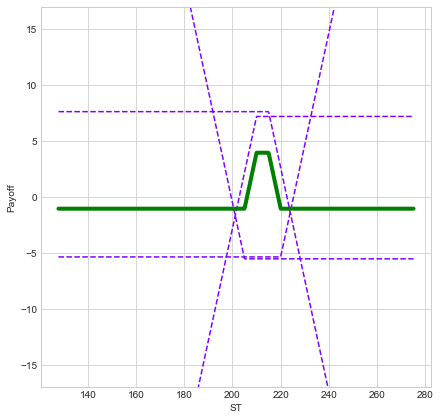

In [134]:
plot_funcs(stockprice, port)